In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [8]:
df1 = pd.read_csv("tc20171021.csv",on_bad_lines='skip')
df2 = pd.read_csv("true_car_listings.csv")
df_full = pd.concat([df1, df2], ignore_index=True)

In [ ]:
## Dataset Statistics

print("Dataset Shape:", df_full.shape)
print("\n" + "="*60)
print("STATISTICAL SUMMARY")
print("="*60)
df_full.describe()

## Key Insights from Statistical Summary

From the statistical analysis above, we observe:

- **Total Records**: 143,115 vehicle records (with 59,739 having IDs)
- **Price Range**: $1,500 - $279,990 with a mean of **$24,352**
- **Median Price**: $22,428 (indicating right-skewed distribution)
- **Model Years**: 1997 - 2018
- **Average Mileage**: 53,803 miles
- **Year Distribution**: Most vehicles are from 2015 (75th percentile)

The 3rd quartile shows that 75% of cars are priced under $31,126, suggesting the dataset primarily consists of mid-range vehicles.

In [10]:
df_full.head(10)

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1.0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2.0,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3.0,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4.0,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5.0,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
5,6.0,17020,2016,16877,Grand Island,NY,KL4CJASB7GB536760,Buick,EncoreFWD
6,7.0,15950,2015,27885,West Covina,CA,KL4CJASB3FB241802,Buick,EncoreFWD
7,8.0,17091,2016,24008,Little Rock,AR,KL4CJASBXGB565542,Buick,EncoreFWD
8,9.0,16995,2015,8624,Punta Gorda,FL,KL4CJFSB7FB173565,Buick,EncoreConvenience
9,10.0,17700,2015,13807,Jacksonville,NC,KL4CJBSB8FB068543,Buick,EncoreConvenience


## Dataset Overview

The dataset contains **9 columns** with the following features:
- **Id**: Unique identifier
- **Price**: Target variable (vehicle price in USD)
- **Year**: Manufacturing year
- **Mileage**: Total miles driven
- **City**: Location city
- **State**: Location state
- **Vin**: Vehicle Identification Number
- **Make**: Vehicle manufacturer (e.g., Buick, Ford, Toyota)
- **Model**: Specific vehicle model

In [13]:
# list the data types for each column
print(df_full.dtypes)

Id         float64
Price        int64
Year         int64
Mileage      int64
City        object
State       object
Vin         object
Make        object
Model       object
dtype: object


## Correlation Analysis

Let's examine the relationships between numerical features to identify key price predictors.

In [ ]:
## Correlation Matrix

print("Correlation Analysis")
print("="*60)
correlation_matrix = df_full.corr()
print("\nKey Correlations with Price:")
print(f"  Year vs Price: {correlation_matrix.loc['Year', 'Price']:.4f} (Strong Positive)")
print(f"  Mileage vs Price: {correlation_matrix.loc['Mileage', 'Price']:.4f} (Strong Negative)")
print(f"  Year vs Mileage: {correlation_matrix.loc['Year', 'Mileage']:.4f} (Strong Negative)")
print("\n" + "="*60)
correlation_matrix

(0.0, 306086.1044435779)

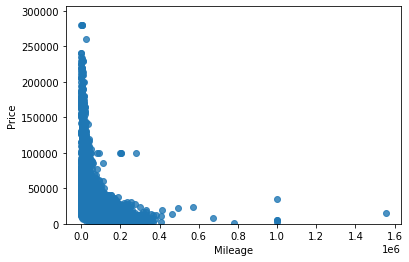

In [19]:
sns.regplot(x="Mileage", y="Price", data=df_full)
plt.ylim(0,)

In the above figure we can see that cars with zero or small Mileage has high prices.

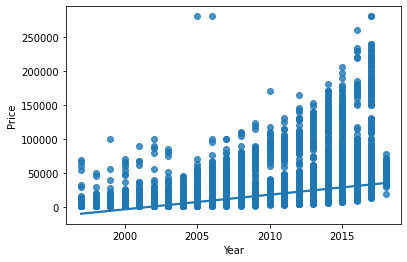

In [20]:
sns.regplot(x="Year", y="Price", data=df_full)

in the above figure we can notice that the newer the model is, the more the price increases.

A good way to visualize categorical variables is by using boxplots so we visualize the model of the cars and the price

In [28]:
sns.set(rc={'figure.figsize':(20,12)})

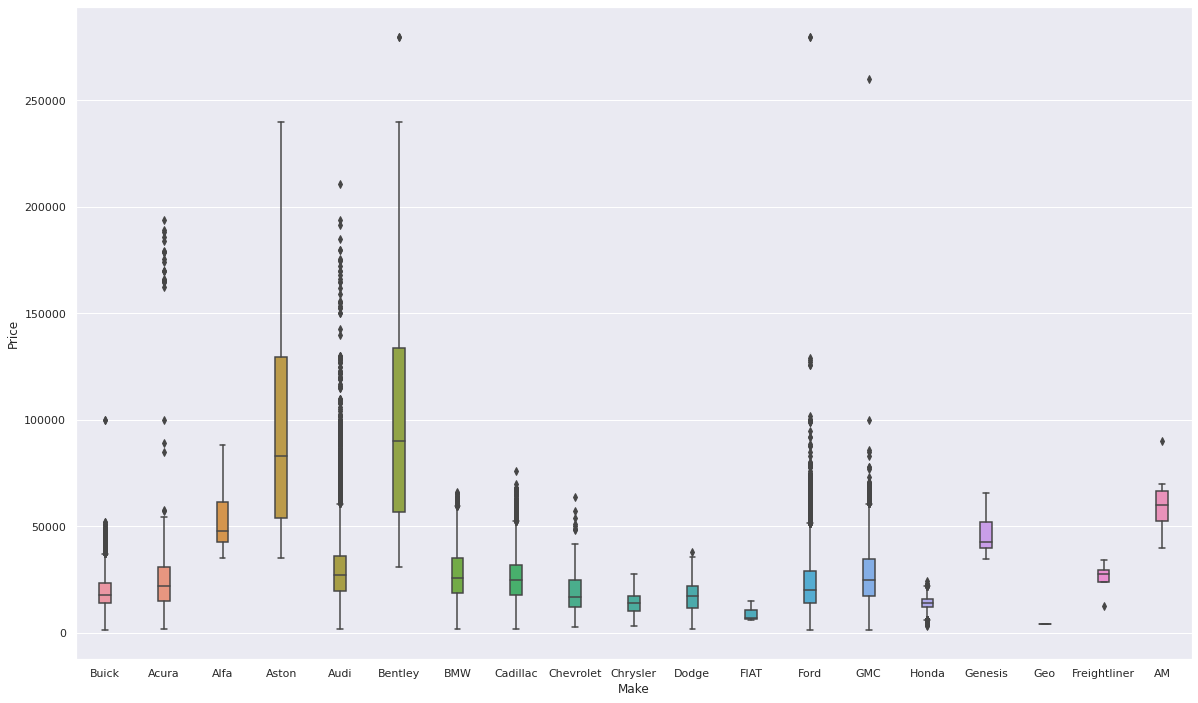

In [29]:
sns.boxplot(x="Make", y="Price",width= 0.2, data=df_full)